# Project 6 - Clean and Analyze Employee Exit Surveys
In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

In this project we will want to analyze the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

A preview of the columns in each data set is below:

Dataset: dete_survey.csv
- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Dataset: tafe_survey.csv
- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


In [2]:
import pandas as pd
import numpy as np

In [3]:
#Read both data sets
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [4]:
#Using Dataframe.info() and other methods to quickly explore data and figure out
#potential next steps
#First, analyzing the dete survey data
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
#Having a look at the first 5 rows
dete_survey.head(5)
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:

#Analyzing the tafe survey data
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [8]:
#Dropping the unnecessary columns from the  dete survey data set
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [9]:
#Dropping unnecessary columns from the tafe survey data set
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

To be aligned with the objective of the analysis, and to not have unnecessary columns, we removed all columns that were not necessary, that is, all columns that, for example, were related to survey multiple choice answer. 

In [10]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

In [11]:
#Checking the column names after performing the changes
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [12]:
#Harmonizing the column names in the tafe_survey_updated data set
tafe_survey_updated=tafe_survey_updated.rename(columns={'Record ID':'id','CESSATION YEAR':'cease_date','Reason for ceasing employment':'separationtype','Gender. What is your Gender?':'gender','CurrentAge. Current Age':'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [13]:
#Checking the column names after harmonizing names
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

So that both datasets can be analyzed it is important to ensure that the key columns, in both sets, have the same terminology so that, when merging sets, for example, it is possible to have one single consolidated source of information.

In [14]:
#First let's identify and select rows where Resignation is contained
#within the separationtype
dete_condition=dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignation=dete_survey_updated[dete_condition==True]

In [15]:
#Copying the data to dete_resignations variable
dete_resignations=dete_resignation.copy()

In [16]:
#Taking the same approach as above, but for the tafe survey
tafe_condition=tafe_survey_updated['separationtype'].str.contains('Resignation')
tafe_resignation=tafe_survey_updated[tafe_condition==True]

In [17]:
#Copying the data to tafe_resignations variable
tafe_resignations=tafe_resignation.copy()

For our end goal we needed to have information regarding Resignations. To do so we proceeded to isolate the data in which the separationtype column had 'Resignation'.

In [18]:
#Now lets clean the cease_date in dete_resignations columns to avoid
#dealing with unnecessary inconsistencies that can corrupt our analysis
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [19]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date']=dete_resignations['cease_date'].astype("float")

In [20]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)


2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [21]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [22]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

Dete Survey Data set:
For the Dete Survey data it is possible to conclude that:
    - The years 2012 and 2013 have the majority of the resignations from the survey (account for ~92%)
    - In the years of 2012 and 2013 only 30 people started working in the company although almost 10 times that value resignated within the same period
Tafe Survey Dara set:
For the Tafe Survey data it is possible to conclude that:
    - The majority of the resignations happened between 2011 and 2012 (account for ~63%

When analyzing the cease_date column, in both data sets, it is possible to conclude that:
    - In the dete survey, 2006 is the latest year and 2014 is the earliest
    - In the tafe survey, 2009 is the latest year and 2013 is the earliest
    - The biggest difference between data sets and years is in 2010, where the tefe data set has 68 rows and the dete data set has 2. Also in 2013, the tefe data set has 55 rows and the dete has 146 (almost 3 times as much)
    - Both data sets don't match in year periods, but the analysis is not year driven, so there is no apparent problem.
    
    

In [23]:
#To create a time spent in the company column in the dete data set
#we will subtract the start date from the resignation date
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

In [24]:
dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

The majority of the population stayed in the company no more than 9 years.

In [25]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [27]:
#Defining a function to be aplied to the dataset based on the value
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True
   

In [28]:
#Using applymap to apply the function to the data set and create a new column based on both dissatisfaction columns
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1,skipna=False)

In [29]:
#Using the any function to create the dissatisfaction column
dete_resignations['dissatisfied']=dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].any(axis=1,skipna=False)

In [30]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [31]:
#copying both columns and assigning to variables
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

It was necessary to have a common and harmonized way of analyzing the dissatisfactions in both data sets. Although the dete data set already had a classification of true or false if some dissatisfaction factor was labelled as true, it was necessary to implement the same approach for the tafe data set, which didn't have such data.
With this, we will be able to look at both data sets and quickly identify which employees were dissastisfied and also link it with the length in the company

In [32]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [33]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

In [34]:
combined_updated=combined.dropna(axis=1,thresh=500)

To effectively analyze both data sets it was necessary to merge them but keep track of which set does the data belong to. To do so we added a column with the name of the survey and then merged both data sets.
After this, and to make the analysis easier, we deleted all columns that would have more than 500 non null values.

In [35]:
combined['institute_service']=combined['institute_service'].astype('str')

In [38]:
combined['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

In [61]:
#Defining a function that will categorized the number of years within the institue
def categories(val):
    if pd.isnull(val):
        return 'Unknown'
    elif val<3:
        return 'New'
    elif val>3 and val<=6:
        return 'Experienced'
    elif val>7 and val<=10:
        return 'Established'
    else:
        return 'Veteran'

In [51]:
#First lets extract only the number left to '.'
combined['institute_service']=combined['institute_service'].str.split('.').str[0]

In [52]:
combined['institute_service'].unique()

array(['7', '18', '3', '15', '14', '5', 'nan', '30', '32', '39', '17',
       '9', '6', '1', '35', '38', '36', '19', '4', '26', '10', '8', '2',
       '0', '23', '13', '16', '12', '21', '20', '24', '33', '22', '28',
       '49', '11', '41', '27', '42', '25', '29', '34', '31', '3-4',
       '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

In [56]:
#Then lets extract the year from the interval rows
combined['institute_service']=combined['institute_service'].str.split('-').str[0]

In [63]:
#Finally, replace text references by a single number and change the data type to float
replace={'More than 20 years':20,'Less than 1 year':1}
combined['institute_service']=combined['institute_service'].replace(replace).astype('float')


In [74]:
#Applying the function to the column to obtain the category of the time spent in the institue
combined['service_cat']=combined['institute_service'].apply(categories)

Since there was a lot of formats in the institute service column, it was necessary to harmonize it and make it more efficient for analysis. To do this we defined categories for each year range, cleaned and harmonized the data in the institute service column and then applied a function to the column that would give us the corresponding categories.

In [68]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [70]:
combined['dissatisfied']=combined['dissatisfied'].fillna(False)

In [77]:
dis_pct=combined.pivot_table('dissatisfied','service_cat')

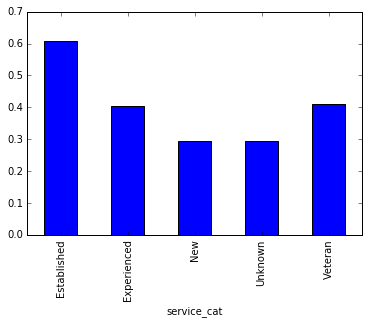

In [83]:
from matplotlib import pyplot as plt
%matplotlib inline
dis_pct.plot(kind='bar',legend=False)
plt.show()


Plotting the dissatisfaction by each category we can see that ~60% of the employees with 7-10 years in the institute are dissatisfied. The New category (less than 3 years) has the lowest percentage of dissatisfaction, under ~30%